# MSE Cost Function

# Example One

# Gradient Descent Minimization

Assume the cost function is:

J(θ)=θ2
 
And we want to find the value of  θ  which minimises  J(θ) 
Assume further we starts with  θ=3 
Gradient descent is an iterative algorithm which we will run many times.

On each iteration, we apply the following "update rule" (the  :=  symbol means replace  θ  with the value computed on the right):

θ:=θ−αddθJ(θ)
 
Alpha is the learning rate.

Assume  α  = 0.1 for now.

ddθJ(θ)=2θ

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
theta = 3
alpha = 0.1
dat = []
for oo in range(0,10):
    res = alpha * 2 * theta # update rule  //α*ddθJ(θ)
    print("{0:.4f} {1:.4f}".format(theta, res))
    dat.append([theta, theta ** 2])
    theta = theta - res

3.0000 0.6000
2.4000 0.4800
1.9200 0.3840
1.5360 0.3072
1.2288 0.2458
0.9830 0.1966
0.7864 0.1573
0.6291 0.1258
0.5033 0.1007
0.4027 0.0805


In [3]:
tmp = pd.DataFrame(dat)
tmp

,0,1
0,3.000000,9.000000
1,2.400000,5.760000
2,1.920000,3.686400
3,1.536000,2.359296
4,1.228800,1.509949
5,0.983040,0.966368
6,0.786432,0.618475
7,0.629146,0.395824
8,0.503316,0.253327
9,0.402653,0.162130


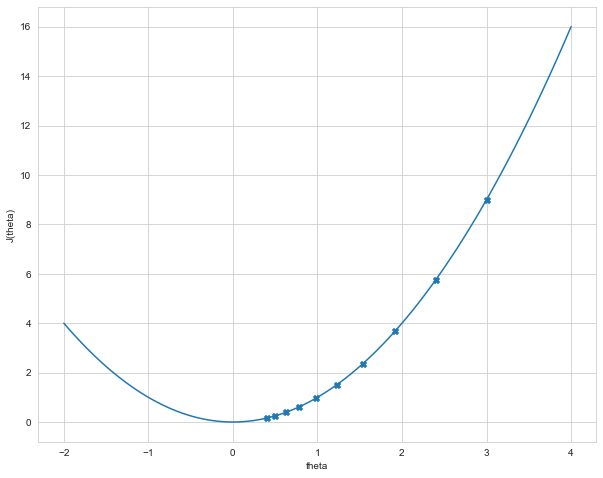

In [4]:
plt.figure(figsize=(10,8))
plt.plot(np.linspace(-2, 4, 100), np.linspace(-2, 4, 100) ** 2);
plt.scatter(tmp.iloc[:,0], tmp.iloc[:,1], marker='X');
plt.xlabel('theta');
plt.ylabel('J(theta)');

# Example two

In [5]:
theta = 3
alpha = 0.01
dat = []
for oo in range(0,10):
    res = alpha * (4 * theta ** 3 + 2 * theta) # update function
    print("{0:.4f} {1:.4f}".format(theta, res))
    dat.append([theta, theta ** 4 + theta ** 2])
    theta = theta - res

3.0000 1.1400
1.8600 0.2946
1.5654 0.1847
1.3807 0.1329
1.2478 0.1027
1.1451 0.0830
1.0621 0.0692
0.9930 0.0590
0.9339 0.0513
0.8827 0.0452


In [6]:
tmp = pd.DataFrame(dat)
tmp

,0,1
0,3.000000,90.000000
1,1.860000,15.428432
2,1.565406,8.455422
3,1.380657,5.539863
4,1.247771,3.980968
5,1.145108,3.030703
6,1.062144,2.400869
7,0.992970,1.958167
8,0.933949,1.633098
9,0.882684,1.386175


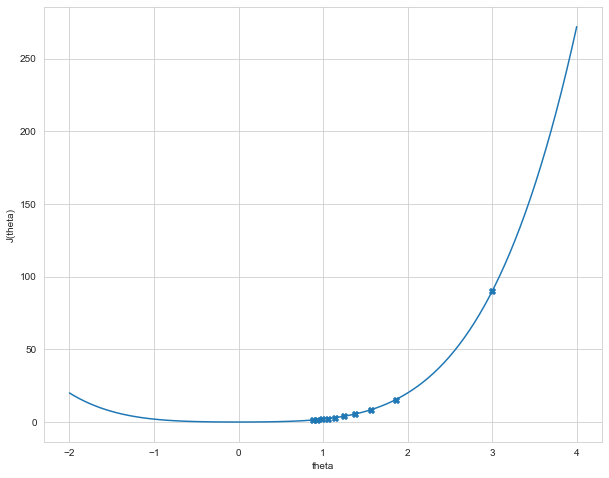

In [8]:
plt.figure(figsize=(10,8))
x_grid = np.linspace(-2, 4, 100)
plt.plot(x_grid, x_grid ** 4 + x_grid ** 2);
plt.scatter(tmp.iloc[:,0], tmp.iloc[:,1], marker='X');
plt.xlabel('theta');
plt.ylabel('J(theta)');

# Applying Gradient Descent to Boston Housing Data

In [9]:
from sklearn.datasets import load_boston
boston_data = load_boston()
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
df.shape

(506, 13)

In [10]:
X = df[['LSTAT']].values
y = boston_data.target

In [11]:
X

array([[ 4.98],
       [ 9.14],
       [ 4.03],
       [ 2.94],
       [ 5.33],
       [ 5.21],
       [12.43],
       [19.15],
       [29.93],
       [17.1 ],
       [20.45],
       [13.27],
       [15.71],
       [ 8.26],
       [10.26],
       [ 8.47],
       [ 6.58],
       [14.67],
       [11.69],
       [11.28],
       [21.02],
       [13.83],
       [18.72],
       [19.88],
       [16.3 ],
       [16.51],
       [14.81],
       [17.28],
       [12.8 ],
       [11.98],
       [22.6 ],
       [13.04],
       [27.71],
       [18.35],
       [20.34],
       [ 9.68],
       [11.41],
       [ 8.77],
       [10.13],
       [ 4.32],
       [ 1.98],
       [ 4.84],
       [ 5.81],
       [ 7.44],
       [ 9.55],
       [10.21],
       [14.15],
       [18.8 ],
       [30.81],
       [16.2 ],
       [13.45],
       [ 9.43],
       [ 5.28],
       [ 8.43],
       [14.8 ],
       [ 4.81],
       [ 5.77],
       [ 3.95],
       [ 6.86],
       [ 9.22],
       [13.15],
       [14.44],
       [

In [13]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [14]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y.reshape(-1,1)).flatten()

In [15]:
alpha = 0.0001
w_ = np.zeros(1 + X_std.shape[1])
cost_ = []
n_ = 100

for i in range(n_):
    y_pred = np.dot(X_std, w_[1:]) + w_[0]   #calculating predicting y
    errors = (y_std - y_pred)               #calculating the errors
    
    w_[1:] += alpha * X_std.T.dot(errors)
    w_[0] += alpha * errors.sum()
    
    cost = (errors**2).sum() / 2.0
    cost_.append(cost)

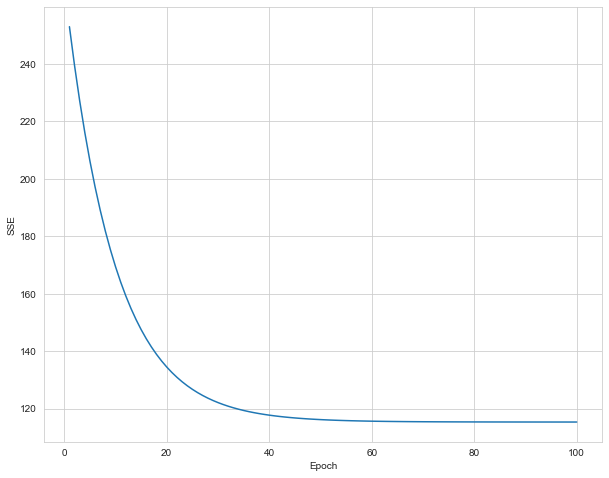

In [16]:
plt.figure(figsize=(10,8))
plt.plot(range(1, n_ + 1), cost_);
plt.ylabel('SSE');
plt.xlabel('Epoch');

In [17]:
w_

array([-7.57793828e-16, -7.33562757e-01])